In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('D:\Jupyter Notebook Files\Diabetes Analysis/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# NUMBER OF ZERO VALUES IN EACH COLUMN
for i in df.columns:
  print(i,"=",(df[i]==0).sum())

Pregnancies = 111
Glucose = 5
BloodPressure = 35
SkinThickness = 227
Insulin = 374
BMI = 11
DiabetesPedigreeFunction = 0
Age = 0
Outcome = 500


In [6]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [7]:
# NUMBER OF ZERO VALUES IN EACH COLUMN
for i in df.columns:
  print(i,"=",(df[i]==0).sum())

Pregnancies = 0
Glucose = 0
BloodPressure = 0
SkinThickness = 0
Insulin = 0
BMI = 0
DiabetesPedigreeFunction = 0
Age = 0
Outcome = 500


<AxesSubplot:>

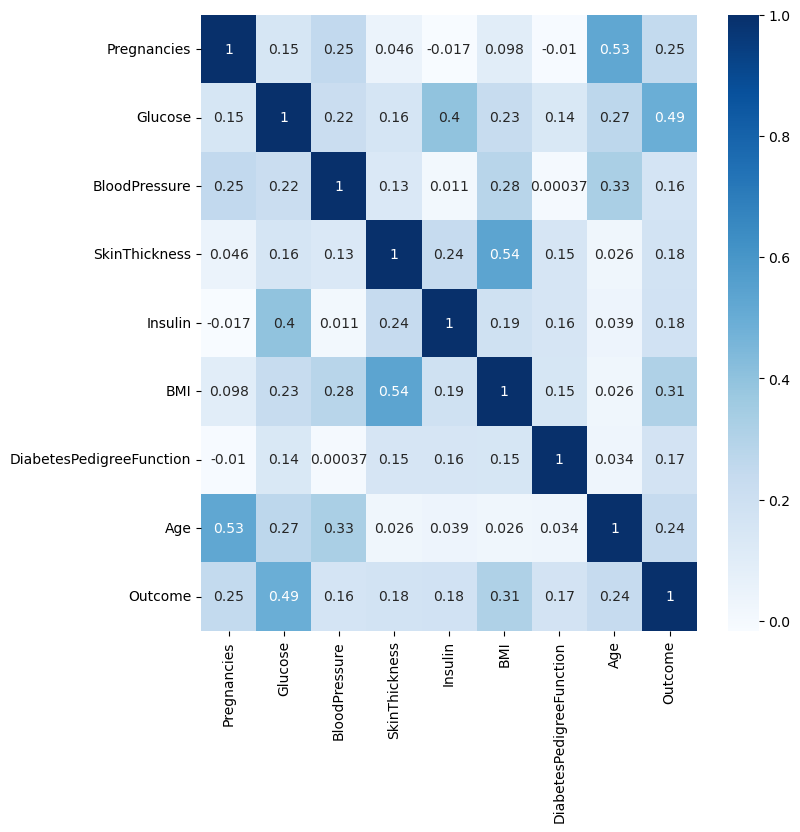

In [8]:
import seaborn as sns
corr=df.corr()
corr_feature=corr.index
plt.figure(figsize=(8,8))
sns.heatmap(df[corr_feature].corr(),annot=True,cmap="Blues")

C:\Users\subhayu\AppData\Local\Temp\ipykernel_11492\418496990.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax,color = "lightblue", ec="red")


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

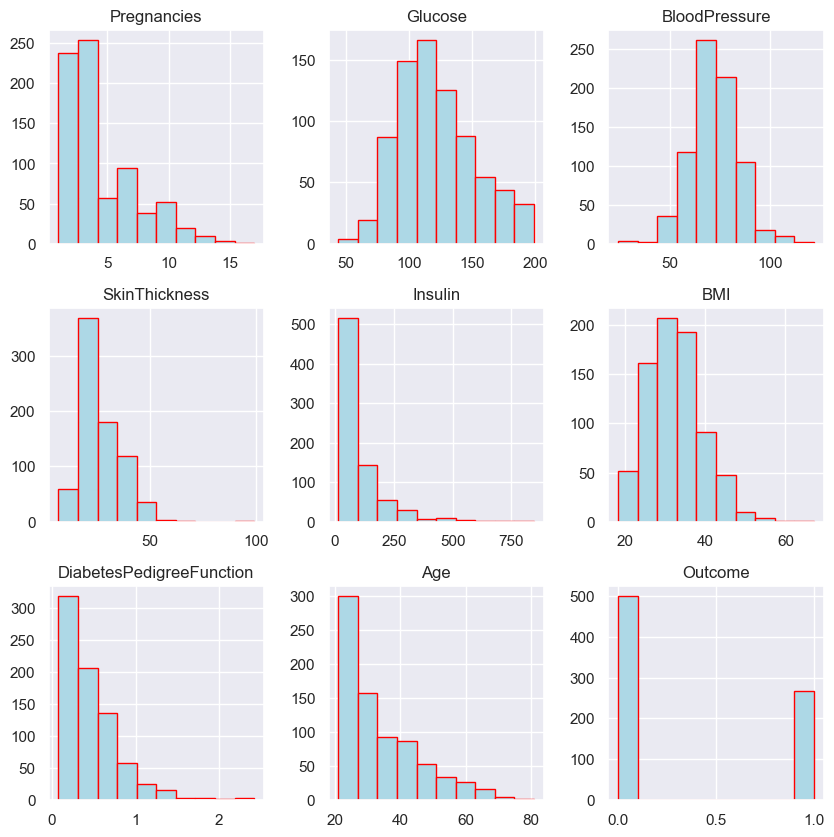

In [9]:
sns.set(style="darkgrid")
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax,color = "lightblue", ec="red")

C:\Users\subhayu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\subhayu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


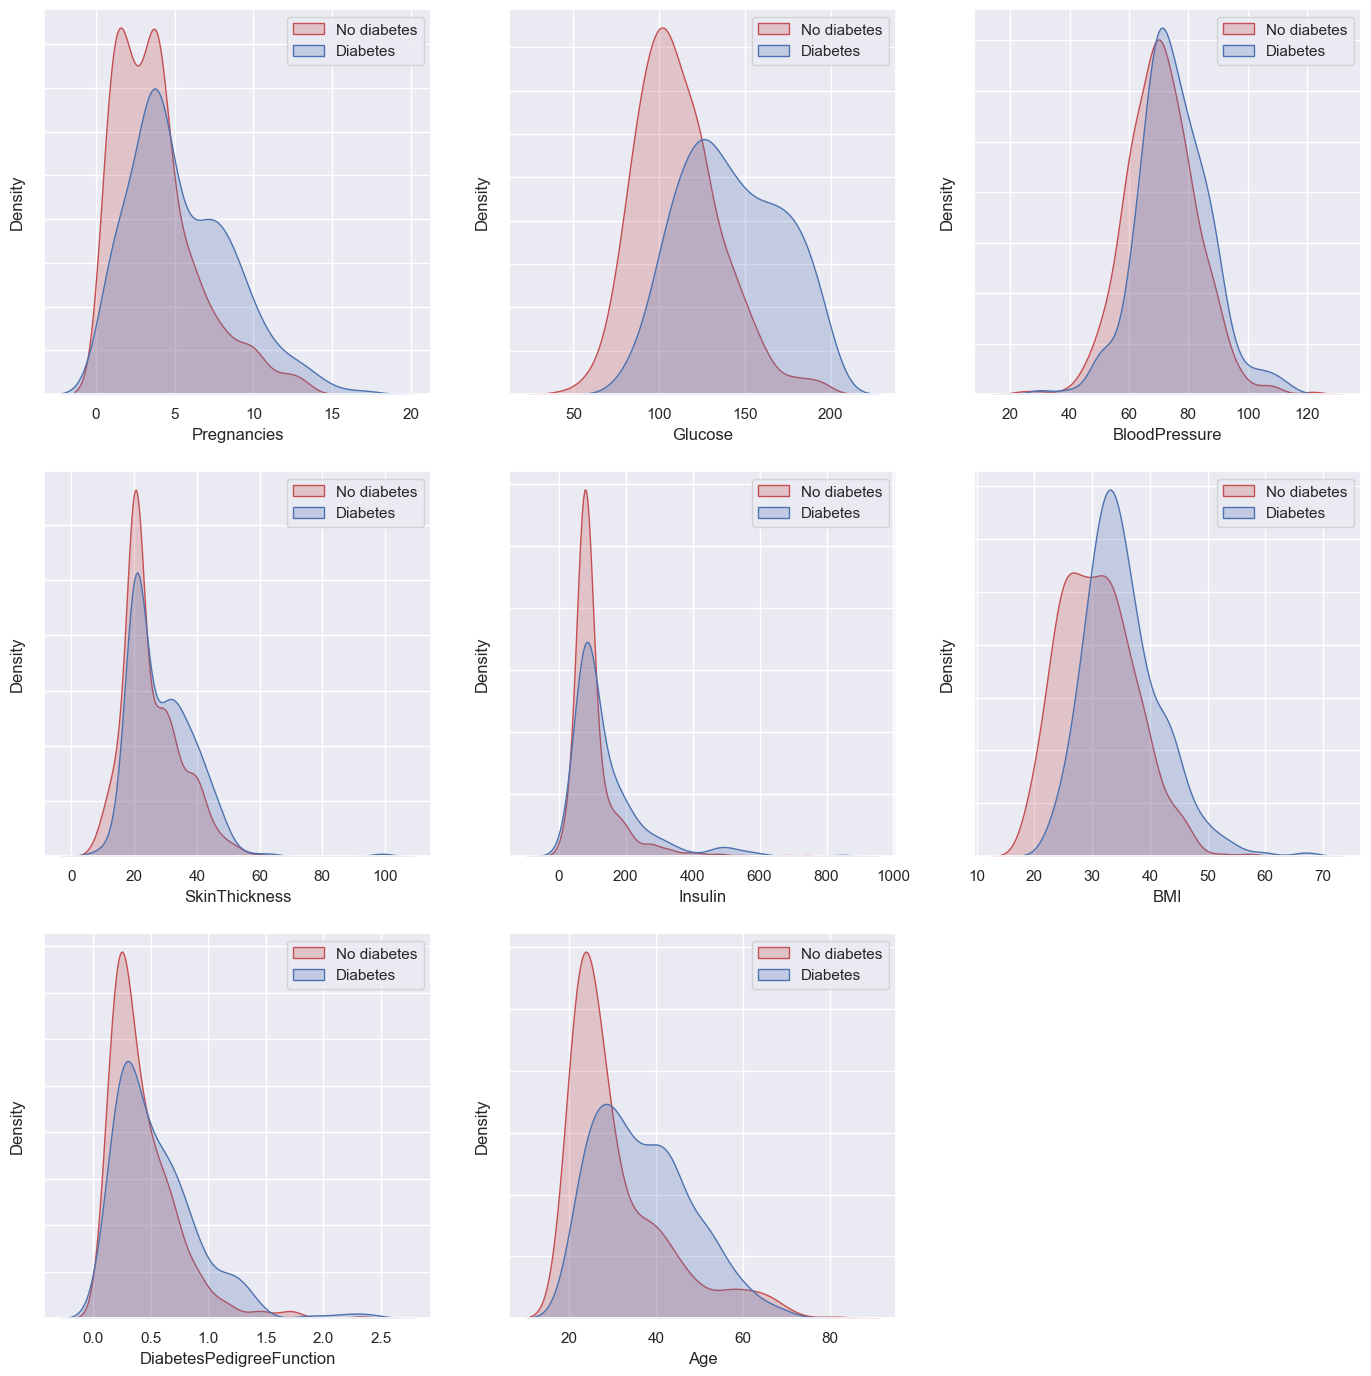

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.subplots (3,3,figsize=(17,17))
for idx, col in enumerate (df.columns) :
  ax = plt.subplot (3,3,idx+1)
  ax.yaxis.set_ticklabels( [ ] )
  fig = sns.kdeplot(df.loc[df.Outcome == 0] [col], shade=True, color="r",label="No diabetes")
  fig = sns.kdeplot(df.loc[df.Outcome == 1] [col], shade=True, color="b",label="Diabetes")
  plt.legend(loc="upper right")
  #ax.set_title(col)

plt.subplot (3, 3, 9).set_visible (False)
plt.show ()

In [11]:
X=df[['Pregnancies','Glucose','SkinThickness','Insulin','BMI','Age']]
y=df[df.columns[-1]]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [51]:
from sklearn import linear_model
logr=linear_model.LogisticRegression(max_iter=10000)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [52]:
logr_pred=logr.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        91
           1       0.80      0.62      0.70        63

    accuracy                           0.78       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.78      0.78      0.77       154



In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,logr_pred)

0.7792207792207793

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,logr_pred,squared=False)

0.4629100498862757

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,logr_pred)

0.21428571428571427

In [35]:
print("Training score: ",logr.score(X_train,y_train))
print("Test score: ",logr.score(X_test,y_test))

Training score:  0.7687296416938111
Test score:  0.7857142857142857


Text(92.25, 0.5, 'Truth')

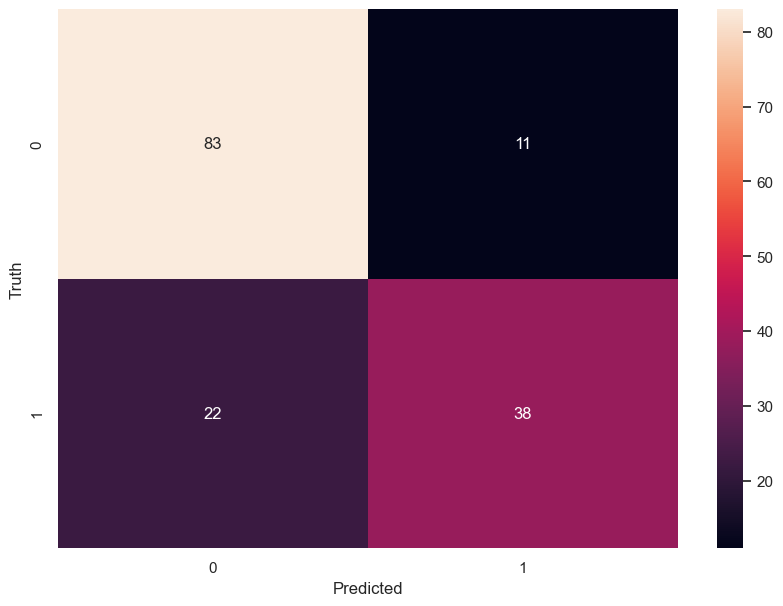

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logr_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
import pickle
pickle.dump(logr,open('diabetespred.pkl','wb'))

In [58]:
pickled_model=pickle.load(open('diabetespred.pkl','rb'))

In [62]:
pickled_model.predict(scaler.transform(np.array([0,137,40,168,43.1,33]).reshape(1,-1)))

C:\Users\subhayu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)